In [63]:
import pandas as pd
import numpy as np


In [64]:
salaries = pd.read_csv("/Users/anjuta/Downloads/salaries.csv", sep=';')



In [65]:

new_salaries = salaries.drop([171,203,235]).values
new_salaries

array([[  53,   69,   18, ...,   14,   16, 3915],
       [  59,   92,   30, ...,    9,   32, 4802],
       [  40,   99,   19, ...,   15,   22, 4445],
       ...,
       [  56,   85,   28, ...,    7,   33, 4841],
       [  41,   98,   21, ...,   10,   28, 4592],
       [  51,   60,   21, ...,    9,   26, 4232]])

In [66]:
np.random.shuffle(new_salaries)

TEST_N = round(new_salaries.shape[0] * 0.3) # .shape[0] gives the dimension on axis 0, here number of samples

X_train = new_salaries[0:new_salaries.shape[0] - TEST_N, 0:6]
Y_train = new_salaries[0:new_salaries.shape[0] - TEST_N, 6]

X_test = new_salaries[new_salaries.shape[0] - TEST_N:, 0:6]
Y_test = new_salaries[new_salaries.shape[0] - TEST_N:, 6]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(173, 6)
(173,)
(74, 6)
(74,)


[3612 3632 3675 3681 3706 3736 3759 3780 3814 3819 3851 3853 3868 3878
 3915 3916 3950 3977 3985 4006 4012 4018 4019 4044 4052 4055 4064 4078
 4080 4084 4092 4093 4116 4119 4122 4123 4134 4141 4155 4157 4162 4172
 4189 4194 4196 4201 4206 4219 4224 4230 4231 4232 4235 4242 4253 4254
 4256 4260 4263 4265 4274 4286 4287 4292 4299 4303 4308 4309 4320 4337
 4341 4342 4353 4356 4358 4367 4372 4380 4393 4398 4402 4413 4424 4427
 4441 4445 4447 4450 4464 4470 4472 4474 4489 4493 4502 4507 4528 4529
 4530 4532 4535 4562 4564 4565 4572 4574 4580 4587 4592 4601 4603 4606
 4609 4616 4618 4624 4633 4639 4650 4661 4666 4673 4674 4689 4692 4695
 4698 4716 4721 4730 4735 4747 4764 4767 4787 4790 4802 4811 4823 4832
 4841 4845 4879 4891 4901 4903 4905 4906 4910 4923 4929 4981 4982 4988
 5002 5016 5032 5084 5087 5095 5098 5146 5189 5269 5304]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1

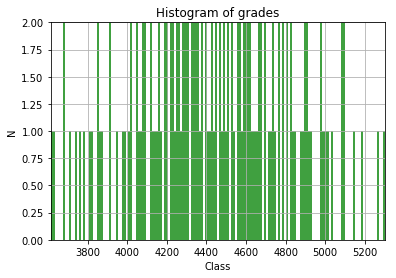

In [67]:
from matplotlib import pyplot as plt

# Compute label counts
classes, counts = np.unique(Y_train.reshape((-1,)), return_counts=True)
fs = np.asarray((classes, counts)).T

print(classes)
print(counts)

n, bins, patches = plt.hist(Y_train, classes.shape[0], facecolor='g', alpha=0.75, align='mid')
plt.xlabel('Class')
plt.ylabel('N')
plt.title('Histogram of grades')
plt.axis([np.min(classes), np.max(classes), 0, np.max(counts)])
plt.grid(True)
    
plt.show()


In [68]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the test set
y_pred = np.around(regr.predict(X_test))

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Coefficients: 
 [17.27639726  5.33420213  0.47411719  0.5686812   0.25635662 34.12983722]
Intercept: 
 2277.892648968096
Mean squared error: 13765.18
Variance score: 0.89


In [69]:
print(np.dot(X_train[94], regr.coef_) + regr.intercept_)
print(regr.predict(X_train[94].reshape(1, -1)))
print(Y_train[94])

4133.3963360257485
[4133.39633603]
4018
